<h1>Topic: Churn or not, A data analyzation of the employees</h1>

<h2>Introduction： </h2>

<h4>The aim of this analyzation is to focus on up to 35 characteristics regarding employees' working. Its aim is to find out what situation makes people make their decision to churn, or say, switch to another company.The findings of this analyzation can be used by the Human Resource Department to find better ways to keep the employees.</h4>


<font color="red"> Warnings: Despite I want to cover every aspect that may comes to an effect of churning. However, this analyzation will not cover areas like candidates' <b> EducationField , JobRole</b> </font>

<h3> Step1 : Importing the data</h3>

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<ipython-input-1-87282b4072ad>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h5>This is where the source came from : <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download">https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download</a></h5>

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<h3>Step 2: Data Preprocessing and Wrangling</h3>

In [3]:
replace_dict_BusinessTravel = {
    'Non-Travel' : 0,
    'Travel_Rarely': 1,
    'Travel_Frequently' : 2
}
df['BusinessTravel'] = df['BusinessTravel'].map(replace_dict_BusinessTravel)

In [4]:
df = pd.get_dummies(df,columns = ['Department'])

In [5]:
df = pd.get_dummies(df,columns = ['Gender'])

In [6]:
df = pd.get_dummies(df,columns = ['MaritalStatus'])

In [7]:
df = pd.get_dummies(df,columns = ['OverTime'])

<h3>Step 3； Logistic Regression</h3>

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<h5>Here we choose 80% of the data to be trainning data, while the rest of them be the testing one</h5>

In [9]:
X = df.drop(columns=['Attrition','EducationField','EmployeeCount','EmployeeNumber','JobRole',"Over18",'StandardHours'], axis=1)
y = df['Attrition']
df_dropped = X
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8673469387755102
Confusion Matrix:
 [[255   0]
 [ 39   0]]


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



<h4>We can see that the accuracy rate is relatively high.</h4>

In [13]:
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [[-8.36471165e-03  2.74614471e-02 -6.26168952e-04  1.74548767e-02
   5.20163915e-03 -3.44647315e-02 -1.07449304e-03 -3.37801683e-02
  -5.82265002e-03 -4.54773608e-02 -3.72740739e-05  2.95499846e-05
   1.00409618e-01 -2.08577155e-02  7.49063830e-05 -6.52303337e-03
  -5.15705082e-02 -1.12076433e-02 -3.01529801e-02 -1.73880042e-02
  -1.12040267e-02 -9.19404377e-02  6.61145938e-02 -7.00173477e-02
   1.44206313e-03 -1.92742398e-02  1.78297806e-02 -5.78642075e-03
   5.78402465e-03 -1.65052397e-02 -1.66495885e-02  3.31524321e-02
  -5.15134012e-02  5.15110051e-02]]
Intercept: [-2.69851039e-06]


<h4>Now let's look at the formula：</h4>

In [14]:
coefficients = model.coef_[0] # Remore the nested 
formula = model.intercept_[0]
formula = "Y = -2.698510387164654e-06"
print(formula,end = " ")
for i in range(0, len(coefficients)):
    print(coefficients[i], end = " * ")
    print(df_dropped.columns[i], end = " + \n")

Y = -2.698510387164654e-06 -0.0083647116519385 * Age + 
0.027461447076013234 * BusinessTravel + 
-0.0006261689521174895 * DailyRate + 
0.017454876742444315 * DistanceFromHome + 
0.005201639149856367 * Education + 
-0.03446473151187905 * EnvironmentSatisfaction + 
-0.0010744930423896458 * HourlyRate + 
-0.033780168323594546 * JobInvolvement + 
-0.005822650016871032 * JobLevel + 
-0.0454773608409842 * JobSatisfaction + 
-3.727407389503377e-05 * MonthlyIncome + 
2.9549984612583534e-05 * MonthlyRate + 
0.1004096184799981 * NumCompaniesWorked + 
-0.020857715519835587 * PercentSalaryHike + 
7.490638302033945e-05 * PerformanceRating + 
-0.006523033368187194 * RelationshipSatisfaction + 
-0.05157050816327676 * StockOptionLevel + 
-0.01120764328259357 * TotalWorkingYears + 
-0.03015298007385394 * TrainingTimesLastYear + 
-0.01738800420703073 * WorkLifeBalance + 
-0.011204026738628598 * YearsAtCompany + 
-0.09194043766846939 * YearsInCurrentRole + 
0.06611459380202947 * YearsSinceLastPromotion +

<h3>Step4 : Point Estimation</h3>

<h4>Let's just assume that we have a man, who is : age:25, travels frequently, with a daily rate of 1000, a distant 10 from home, education 4 degress, rate environmental statisfication at 2, Hourly rate:90, Jobevovlment 4, job level 1, Job satisfication 2, Num of companies worked 0, Percent Salary Hike 15, Performance rating 3, Relationship Satisfication 2, Stock Option level 0, TotalWorking Years 3,  TrainingTest last year 2, WorkLifeBalance 1, YearsAtCompany 1.5, YearsIncurrentRole 0.5, YearsSince Last Promotion 0.5, YearsWith CurrManager 1, belongs to Research& Development, Has not married, works overtime</h4>
<h4>Here's the Question: will he have attrition?</h4>

In [20]:
A = model.predict_proba([[25,1,1000,10,4,2,90,4,1,2,6000,20000,0,15,3,2,0,3,2,1,1.5,0.5,0.5,1,0,1,0,0,1,0,0,1,0,1]]) #34

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
A

array([[0.75179644, 0.24820356]])

<h4>Thus we can say the man will churn at a probability of 0.7517..</h4>

<h3>Step:5 interactive visual analytics methodology</h3>

In [30]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [31]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<h4>We want to find out whether the daily rate and age are the biggest influences towards the attrition, therefore we draw a scatter plot with red ones———Attrition and Blue ones —— Not Attrition </h4>

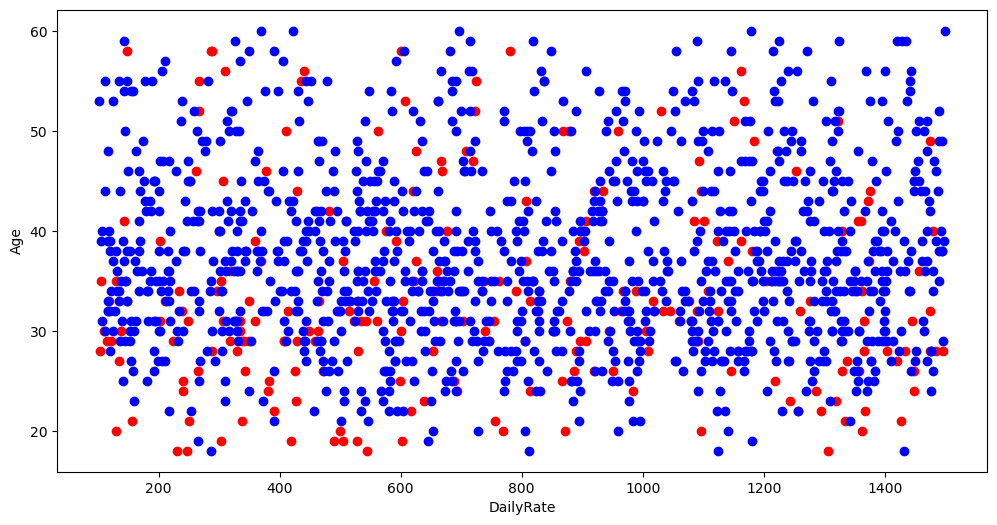

In [55]:
x_set1 = []
x_set2 = []
y_set1 = []
y_set2 = []
plt.figure(figsize=(12, 6))
for index, row in df.iterrows(): 
    if row['Attrition'] == 'Yes':
        x_set1.append(row['DailyRate'])
        y_set1.append(row['Age'])
    elif row['Attrition'] == 'No':
        x_set2.append(row['DailyRate'])
        y_set2.append(row['Age'])
plt.scatter(x_set1, y_set1, color='red')
plt.scatter(x_set2, y_set2, color='blue')
plt.xlabel("DailyRate")
plt.ylabel("Age")
plt.show()

<h4>We can tell that: For Daily rate we don't really see a correlation in between; however for age, employee with younger age tend to get attrition</h4>